## Reaproveitamento e Justificativa do Dataset

Utilizamos neste trabalho o mesmo dataset aplicado na tarefa anterior com MLP: o "Heart Attack Risk Prediction Dataset", que contém variáveis clínicas, comportamentais e de estilo de vida relacionadas ao risco de ataque cardíaco.

Esse conjunto é adequado para Mapas Auto-Organizáveis (SOM), pois possui variáveis multivariadas contínuas e categóricas que podem revelar padrões internos por meio de agrupamentos topológicos.

### Modificações feitas no pré-processamento:

- Remoção da coluna `Patient ID` (identificador irrelevante).
- Codificação de variáveis categóricas com `pd.get_dummies`.
- Normalização dos dados com `MinMaxScaler`.

Essas etapas garantem que os dados estejam padronizados e prontos para o treinamento do SOM.


# Heart Attack Risk Prediction Dataset
O conjunto de dados Heart Attack Risk Prediction é utilizado para prever o risco de ataque cardíaco com base em fatores médicos e de estilo de vida. Ele contém informações como **idade, gênero, hábitos** (tabagismo, consumo de álcool, dieta, exercício), **condições médicas** (diabetes, obesidade, histórico cardíaco) e **exames clínicos** (colesterol, pressão arterial, CK-MB, troponina).

O dataset inclui **26 colunas** com atributos que abrangem aspectos clínicos, comportamentais, socioeconômicos e geográficos, fornecendo uma visão abrangente dos fatores de risco.

### Descrição das Colunas
**Patient ID** – *Identificador único de cada paciente*.  
**Age** – *Idade do paciente*.  
**Sex** – *Gênero do paciente (Male/Female)*.  
**Cholesterol** – *Nível de colesterol do paciente*.  
**Blood Pressure** – *Pressão arterial do paciente (sistólica/diastólica)*.  
**Heart Rate** – *Frequência cardíaca do paciente*.  
**Diabetes** – *Indica se o paciente tem diabetes (1: Sim, 0: Não)*.  
**Family History** – *Histórico familiar de doenças cardíacas (1: Sim, 0: Não)*.  
**Smoking** – *Indica se o paciente é fumante (1: Sim, 0: Não)*.  
**Obesity** – *Indica se o paciente é obeso (1: Sim, 0: Não)*.  
**Alcohol Consumption** – *Nível de consumo de álcool (None/Light/Moderate/Heavy)*.  
**Exercise Hours Per Week** – *Quantidade de horas semanais de exercícios físicos*.  
**Diet** – *Hábitos alimentares do paciente (Healthy/Average/Unhealthy)*.  
**Previous Heart Problems** – *Histórico de problemas cardíacos prévios (1: Sim, 0: Não)*.  
**Medication Use** – *Indica se o paciente faz uso de medicamentos (1: Sim, 0: Não)*.  
**Stress Level** – *Nível de estresse do paciente (escala de 1 a 10)*.  
**Sedentary Hours Per Day** – *Número de horas diárias em atividades sedentárias*.  
**Income** – *Nível de renda do paciente*.  
**BMI** – *Índice de Massa Corporal (Body Mass Index)*.  
**Triglycerides** – *Nível de triglicerídeos no sangue*.  
**Physical Activity Days Per Week** – *Dias da semana em que o paciente pratica atividades físicas*.  
**Sleep Hours Per Day** – *Média de horas de sono por dia*.  
**Country** – *País de residência do paciente*.  
**Continent** – *Continente onde o paciente reside*.  
**Hemisphere** – *Hemisfério de residência do paciente*.  
**Heart Attack Risk** – *Indica o risco de ataque cardíaco (1: Sim, 0: Não)*.

    - 8.763 amostras no total
    - 7.010 amostras reservadas para treino (80%)
    - 1.753 amostras reservadas para teste (20%)

Cada amostra possui um rótulo binário (0 = Baixo Risco, 1 = Alto Risco). O objetivo é treinar um modelo de Rede Neural MLP para prever corretamente o risco de ataque cardíaco com base nos dados do paciente.

## 1. Importação das Bibliotecas

In [9]:
# 🧠⋆｡˚❀˚｡⋆ 1. Bibliotecas Necessárias ⋆｡˚❀˚｡⋆🧠

# 🔹 Manipulação e Análise de Dados
import pandas as pd     # Trabalha com tabelas (DataFrames)
import numpy as np      # Trabalha com vetores e cálculos numéricos

# 📊 Visualização Gráfica
import matplotlib.pyplot as plt     # Geração de gráficos simples (linha, barra, etc.)
import seaborn as sns               # Gráficos mais bonitos e informativos
import math                         # Usado para cálculos como arredondamento em gráficos

# 🛠️ Pré-processamento dos Dados
from sklearn.model_selection import train_test_split    # Separa dados em treino e teste
from sklearn.preprocessing import StandardScaler        # Normaliza/padroniza os dados
from sklearn.preprocessing import LabelEncoder

# 🎯 Avaliação do Modelo
from sklearn.metrics import classification_report       # Mostra precisão, recall e f1-score
from sklearn.metrics import confusion_matrix            # Gera a matriz de confusão
from sklearn.metrics import ConfusionMatrixDisplay      # Exibe a matriz de confusão graficamente

# 🧠 Redes Neurais com TensorFlow/Keras
import tensorflow as tf                                 # Framework principal de Deep Learning
from tensorflow import keras                            # API de alto nível do TensorFlow
from tensorflow.keras.models import Sequential          # Modelo sequencial (camada por camada)
from tensorflow.keras.layers import Dense, Dropout      # Camadas densas e Dropout
from tensorflow.keras.callbacks import EarlyStopping    # Interrompe o treino quando não melhora

# ☁️ Acesso a Datasets Externos
import os                                               # Lidar com arquivos e diretórios
import shutil                                           # Mover/copiar/remover arquivos
import kagglehub                                        # Baixar datasets direto do KaggleHub
from collections import Counter

## 2. Carregamento do Dataset

In [11]:
# 📁⋆｡˚❀˚｡⋆ Carregando o Dataset ⋆｡˚❀˚｡⋆📁

# Baixar o dataset do KaggleHub
path = kagglehub.dataset_download("iamsouravbanerjee/heart-attack-prediction-dataset")

# Criar diretório de destino (caso não exista)
dest_dir = "/content/heart-attack-dataset"
os.makedirs(dest_dir, exist_ok=True)

# Mover os arquivos baixados para o diretório desejado
for file in os.listdir(path):
    src_path = os.path.join(path, file)
    dest_path = os.path.join(dest_dir, file)
    shutil.copy(src_path, dest_path)

print("✨ Dataset movido para:", dest_dir, "✨")

# Carregar o dataset em um DataFrame
import pandas as pd
dataset_path = os.path.join(dest_dir, "heart_attack_prediction_dataset.csv")
df = pd.read_csv(dataset_path)
print("✨ Dados carregados com sucesso! ✨")

# Visualizar as primeiras linhas
df.head()

✨ Dataset movido para: /content/heart-attack-dataset ✨
✨ Dados carregados com sucesso! ✨


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


## 3. Explorando e Entendendo os Dados

- Informações do Dataset
- Verificação dos Valores Ausentes
- Estatísticas descritivas

In [16]:
print("🔍 Informações do dataset:")
df.info()

🔍 Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64

In [17]:
print("Verificando valores ausentes:")
print(df.isnull().sum())

Verificando valores ausentes:
Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: i

In [18]:
duplicados = df.duplicated().sum()
print(f"🔄 Número de valores duplicados: {duplicados}")

🔄 Número de valores duplicados: 0


In [19]:
# Estatísticas descritivas
print("\n📊 Estatísticas descritivas:")
print(df.describe())


📊 Estatísticas descritivas:
               Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026   

## 4. Estaísticas Básicas

- **Tabagismo** e Risco de Ataque Cardíaco
- **Diabetes** e Risco de Ataque Cardíaco
- **Obesidade** e Risco de Ataque Cardíaco
- **Histórico Familiar** e Risco de Ataque Cardíaco
- **Análise Geral**

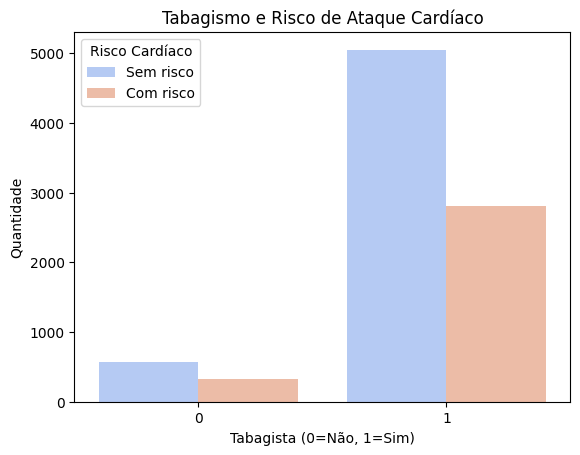

In [20]:
# 🚬⋆｡˚❀˚｡⋆ Tabagismo e Risco de Ataque Cardíaco ⋆｡˚❀˚｡⋆

sns.countplot(x='Smoking', hue='Heart Attack Risk', data=df, palette='coolwarm')

plt.title('Tabagismo e Risco de Ataque Cardíaco')
plt.xlabel('Tabagista (0=Não, 1=Sim)')
plt.ylabel('Quantidade')
plt.legend(title='Risco Cardíaco', labels=['Sem risco', 'Com risco'])

plt.show()

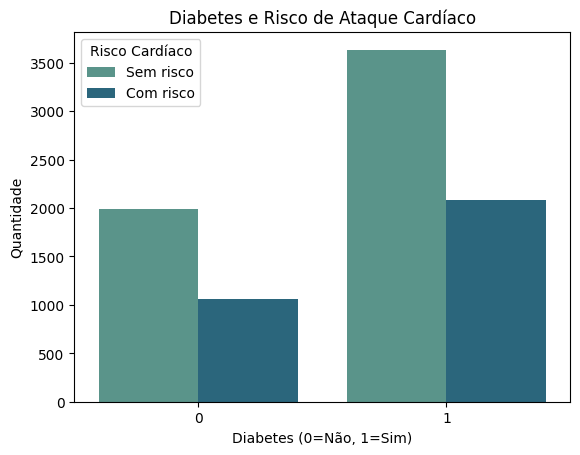

In [21]:
# 🍬⋆｡˚❀˚｡⋆ Diabetes e Risco de Ataque Cardíaco ⋆｡˚❀˚｡⋆❤️

sns.countplot(x='Diabetes', hue='Heart Attack Risk', data=df, palette='crest')

plt.title('Diabetes e Risco de Ataque Cardíaco')
plt.xlabel('Diabetes (0=Não, 1=Sim)')
plt.ylabel('Quantidade')
plt.legend(title='Risco Cardíaco', labels=['Sem risco', 'Com risco'])

plt.show()

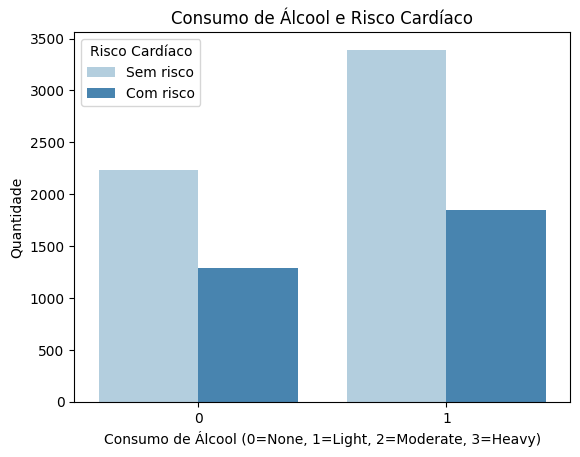

In [22]:
# 🍷⋆｡˚❀˚｡⋆ Consumo de Álcool e Risco de Ataque Cardíaco ⋆｡˚❀˚｡⋆❤️

sns.countplot(x='Alcohol Consumption', hue='Heart Attack Risk', data=df, palette='Blues')

plt.title('Consumo de Álcool e Risco Cardíaco')
plt.xlabel('Consumo de Álcool (0=None, 1=Light, 2=Moderate, 3=Heavy)')
plt.ylabel('Quantidade')
plt.legend(title='Risco Cardíaco', labels=['Sem risco', 'Com risco'])

plt.show()

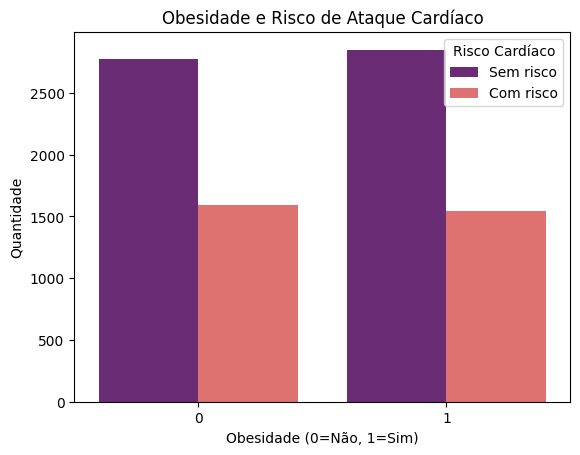

In [23]:
# 🍔⋆｡˚❀˚｡⋆ Obesidade e Risco de Ataque Cardíaco ⋆｡˚❀˚｡⋆❤️

sns.countplot(x='Obesity', hue='Heart Attack Risk', data=df, palette='magma')

plt.title('Obesidade e Risco de Ataque Cardíaco')
plt.xlabel('Obesidade (0=Não, 1=Sim)')
plt.ylabel('Quantidade')
plt.legend(title='Risco Cardíaco', labels=['Sem risco', 'Com risco'])

plt.show()

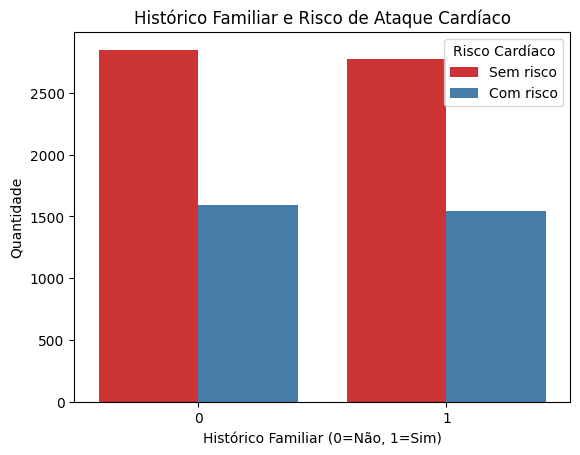

In [24]:
# 🧬⋆｡˚❀˚｡⋆ Histórico Familiar e Risco de Ataque Cardíaco ⋆｡˚❀˚｡⋆❤️

sns.countplot(x='Family History', hue='Heart Attack Risk', data=df, palette='Set1')

plt.title('Histórico Familiar e Risco de Ataque Cardíaco')
plt.xlabel('Histórico Familiar (0=Não, 1=Sim)')
plt.ylabel('Quantidade')
plt.legend(title='Risco Cardíaco', labels=['Sem risco', 'Com risco'])

plt.show()

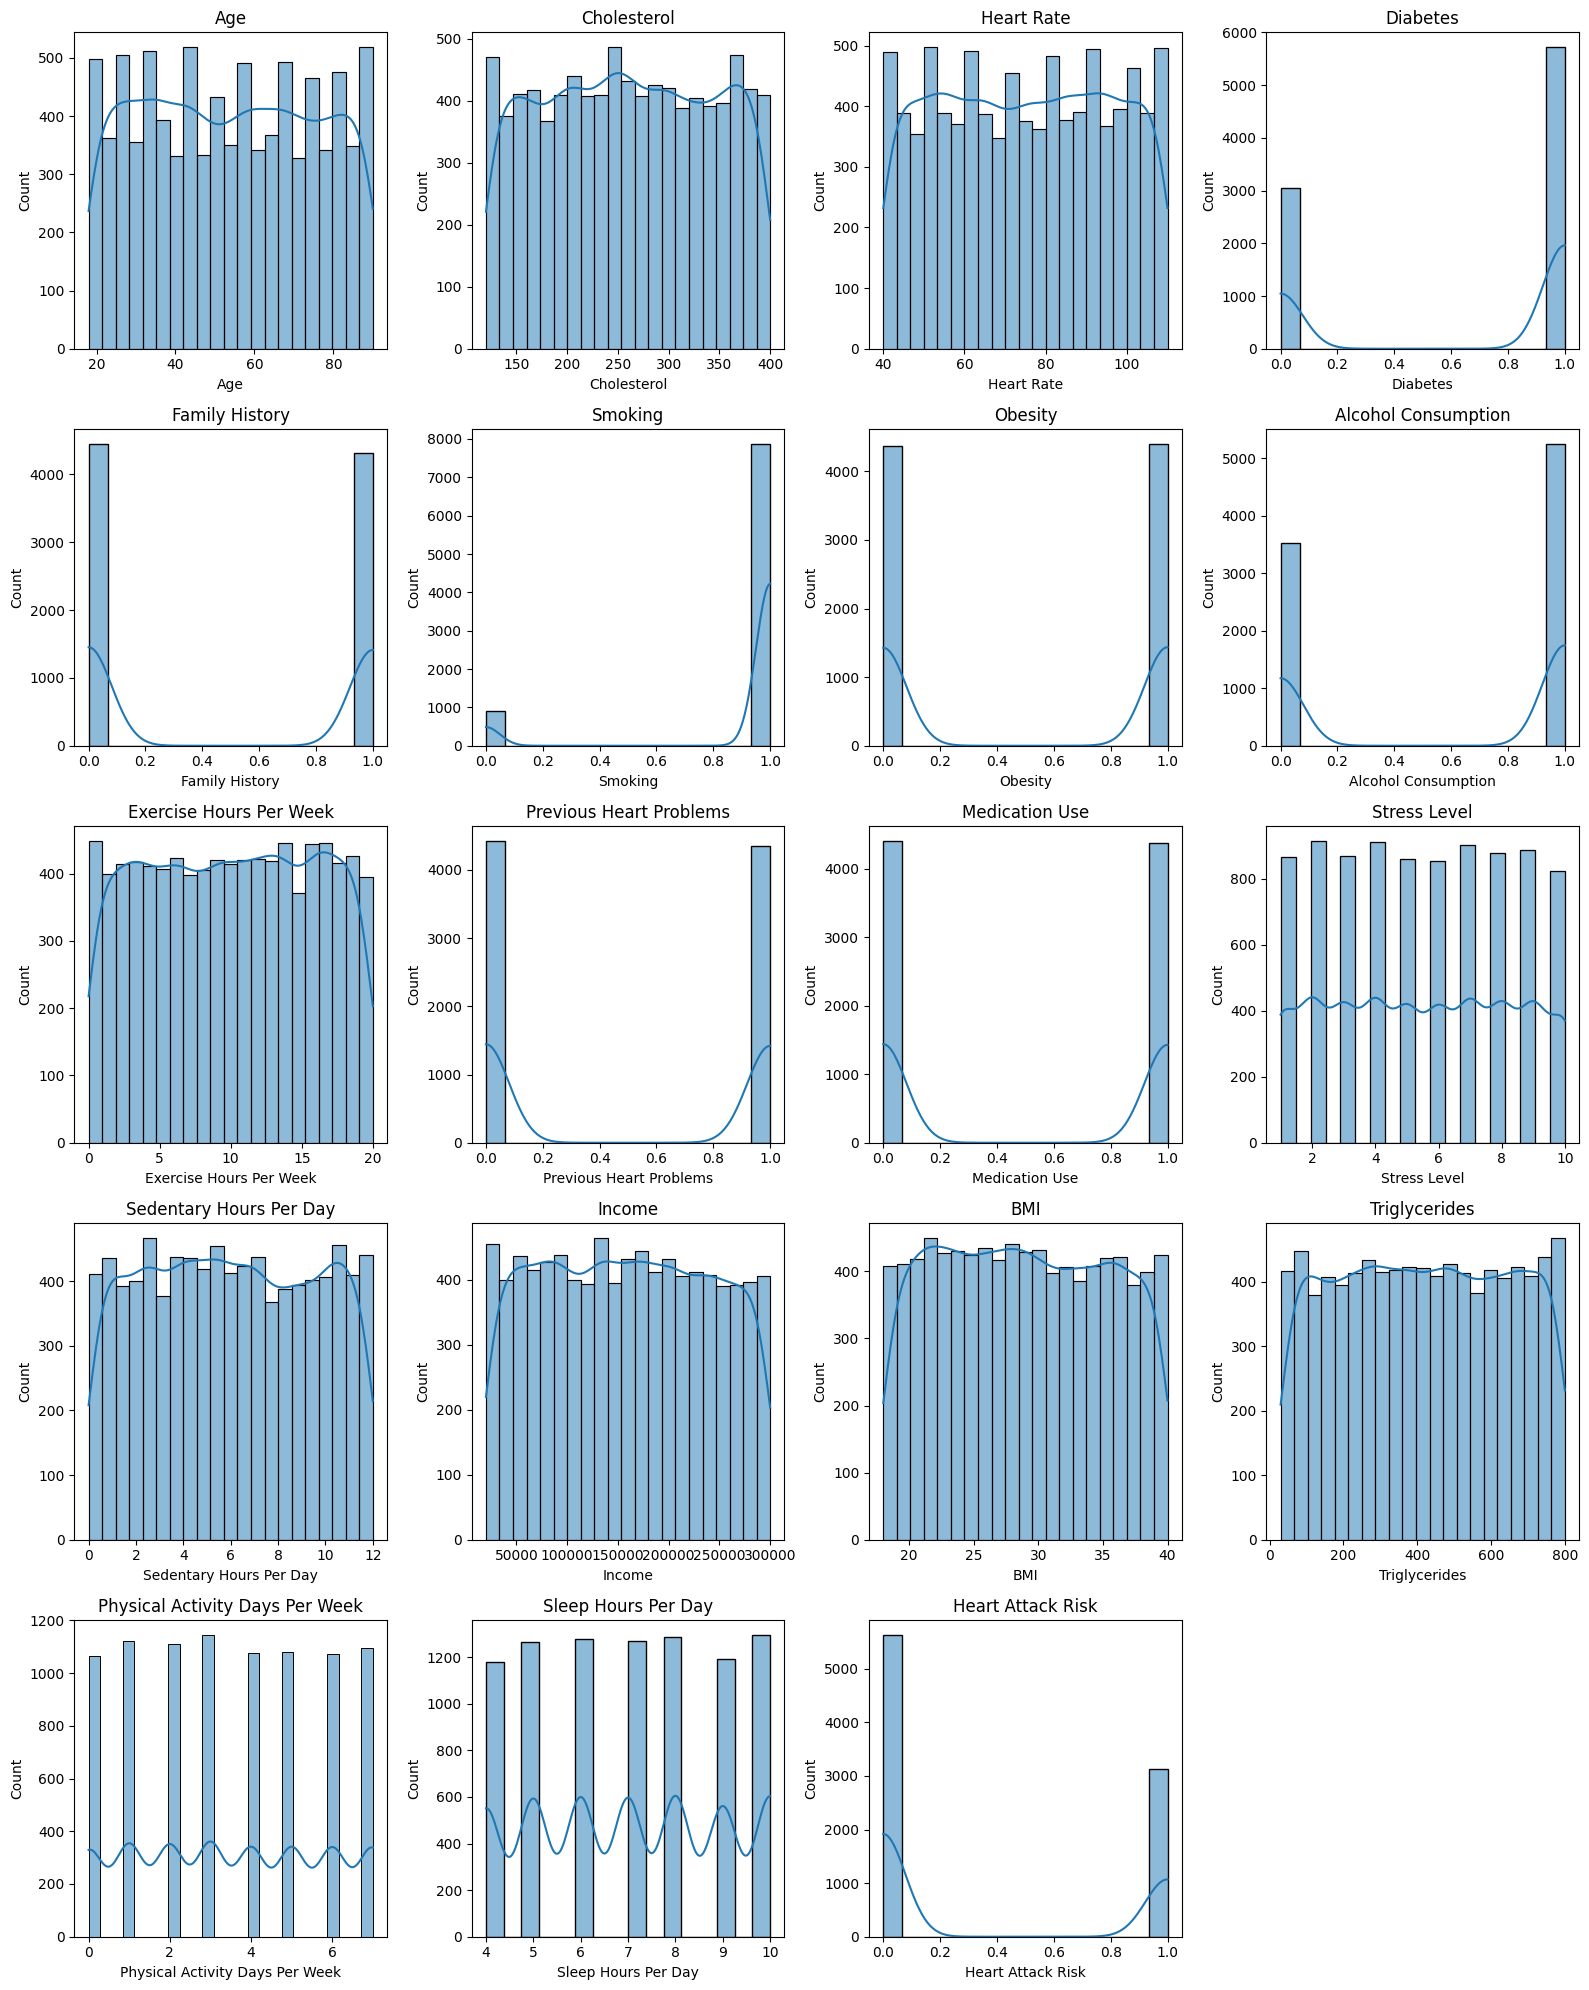

In [25]:
# 📊⋆｡˚❀˚｡⋆ Distribuição das Variáveis Numéricas ⋆｡˚❀˚｡⋆🧮
# Gera histogramas automáticos para todas as colunas numéricas do dataset

# Define colunas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Define layout automático (máximo de 4 colunas por linha)
n_cols = 4
n_rows = math.ceil(len(numeric_cols) / n_cols)

# Plota
plt.figure(figsize=(4 * n_cols, 4 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

## 5. Pré-processar os dados

- Remoção de Colunas de Colunas que não influenciam na predição
- Codificação dos Dados (One-Hote e Labeling)
- Salvamento do novo dataset

In [26]:
# Removendo a coluna 'Patient ID' porque não influencia na predição
df.drop(columns=['Patient ID'], inplace=True)

In [27]:
# Removendo o espaço extra do nome da coluna
df.columns = df.columns.str.strip()

# Codificação para variáveis categóricas
label_encoder = LabelEncoder()

# Codificando 'Sex'
# 🧩 Lista de colunas categóricas nominais para One-Hot Encoding (transforma categorias em colunas binárias)
one_hot_columns = ['Sex']

# 🟦 Aplicando One-Hot Encoding
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

# Codificando 'Diet'
df['Diet'] = df['Diet'].map({'Healthy': 0, 'Average': 1, 'Unhealthy': 2})

# Codificando 'Country'
df['Country'] = label_encoder.fit_transform(df['Country'])
df['Continent'] = label_encoder.fit_transform(df['Continent'])
df['Hemisphere'] = label_encoder.fit_transform(df['Hemisphere'])
df['Alcohol Consumption'] = label_encoder.fit_transform(df['Alcohol Consumption'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])

# Separando a coluna 'Blood Pressure' em duas novas colunas: sistólica e diastólica
df[['BP_Systolic', 'BP_Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)

# Removendo a coluna original de pressão (formato string) após o split
df.drop(columns=['Blood Pressure'], inplace=True)

# Verificando as primeiras linhas do dataset após a transformação
print(df.head())

# Salvando o novo dataset
df.to_csv('heart-attack-dataset-encoded.csv', index=False)  # Salve o dataset codificado

   Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  Obesity  \
0   67           88          72         0               0        1        0   
1   21          269          98         1               1        1        1   
2   21          204          72         1               0        0        0   
3   84          263          73         1               1        1        0   
4   66          198          93         1               1        1        1   

   Alcohol Consumption  Exercise Hours Per Week  Diet  ...  Triglycerides  \
0                    0                 4.168189     1  ...            286   
1                    1                 1.813242     2  ...            235   
2                    0                 2.078353     0  ...            587   
3                    1                 9.828130     1  ...            378   
4                    0                 5.804299     2  ...            231   

   Physical Activity Days Per Week  Sleep Hours Per Day  Count

In [28]:
# Verifique se há valores ausentes em qualquer coluna
print(df.isnull().sum())

Age                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
Sex_Male                           0
BP_Systolic                        0
BP_Diastolic                       0
dtype: int64


## Treinamento e Configuração do SOM

Configuramos um SOM com uma grade de 10x10 neurônios, totalizando 100 unidades. Esse tamanho é adequado para detectar agrupamentos em um conjunto de dados de porte médio. Os hiperparâmetros definidos foram:

- `sigma=1.0`: raio inicial da vizinhança.
- `learning_rate=0.5`: taxa de aprendizado.
- `epochs=1000`: número de ciclos de atualização.

Esses parâmetros foram ajustados com base em testes manuais, buscando equilíbrio entre organização topológica e tempo de convergência.

In [30]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=733690e31b01f2e7c008981d3aff312668d8fd275898aa481389bfd99b5dc708
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


In [32]:
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

df = pd.get_dummies(df)
X = df.values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

som_shape = (10, 10)
som = MiniSom(x=som_shape[0], y=som_shape[1], input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, 1000)


## Avaliação e Visualização do SOM

Avaliamos o desempenho do SOM com duas métricas:

- **Quantization Error**: mede a média da distância entre os dados e seus neurônios vencedores. Quanto menor, melhor.
- **Topographic Error**: mede se os dados próximos continuam próximos no mapa (preservação topológica).

Além disso, usamos visualizações para entender melhor os agrupamentos formados:
- **Hit Map**: mostra quantas vezes cada neurônio foi ativado.
- **U-Matrix**: mostra as distâncias entre os neurônios vizinhos.
- **Component Planes**: mostra como cada variável influencia o mapa.

In [33]:
# Quantization Error
q_error = som.quantization_error(X_scaled)

# Topographic Error
def topographic_error(som, data):
    error_count = 0
    for x in data:
        distances = np.linalg.norm(som._weights - x, axis=2)
        bmu_idx = np.unravel_index(np.argmin(distances), distances.shape)
        distances[bmu_idx] = np.inf
        second_bmu_idx = np.unravel_index(np.argmin(distances), distances.shape)

        # Verifica se o segundo BMU é vizinho
        if abs(bmu_idx[0] - second_bmu_idx[0]) > 1 or abs(bmu_idx[1] - second_bmu_idx[1]) > 1:
            error_count += 1
    return error_count / len(data)

t_error = topographic_error(som, X_scaled)

print(f"Quantization Error: {q_error:.4f}")
print(f"Topographic Error: {t_error:.4f}")


Quantization Error: 1.5268
Topographic Error: 0.5867


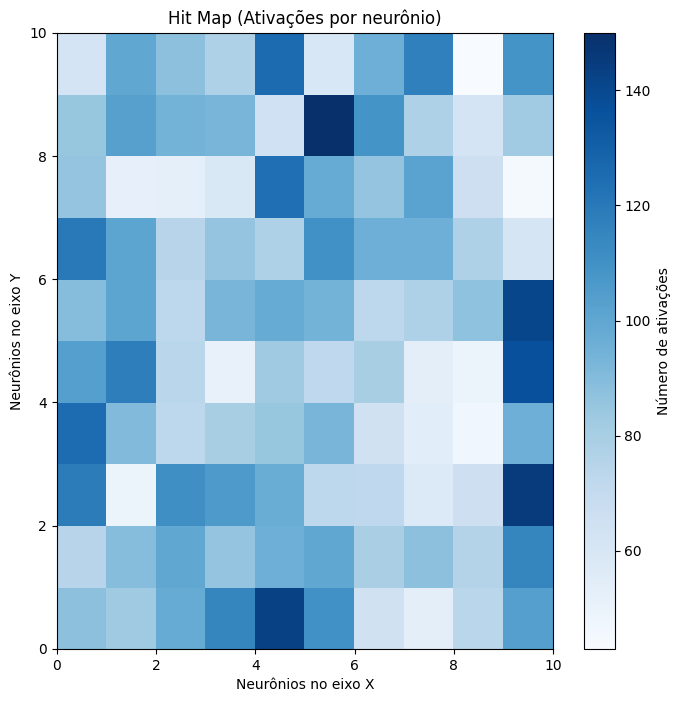

In [34]:
plt.figure(figsize=(8, 8))
plt.title("Hit Map (Ativações por neurônio)")
frequencies = np.zeros(som_shape)
for x in X_scaled:
    bmu = som.winner(x)
    frequencies[bmu] += 1
plt.pcolor(frequencies.T, cmap='Blues')
plt.colorbar(label='Número de ativações')
plt.xlabel("Neurônios no eixo X")
plt.ylabel("Neurônios no eixo Y")
plt.show()


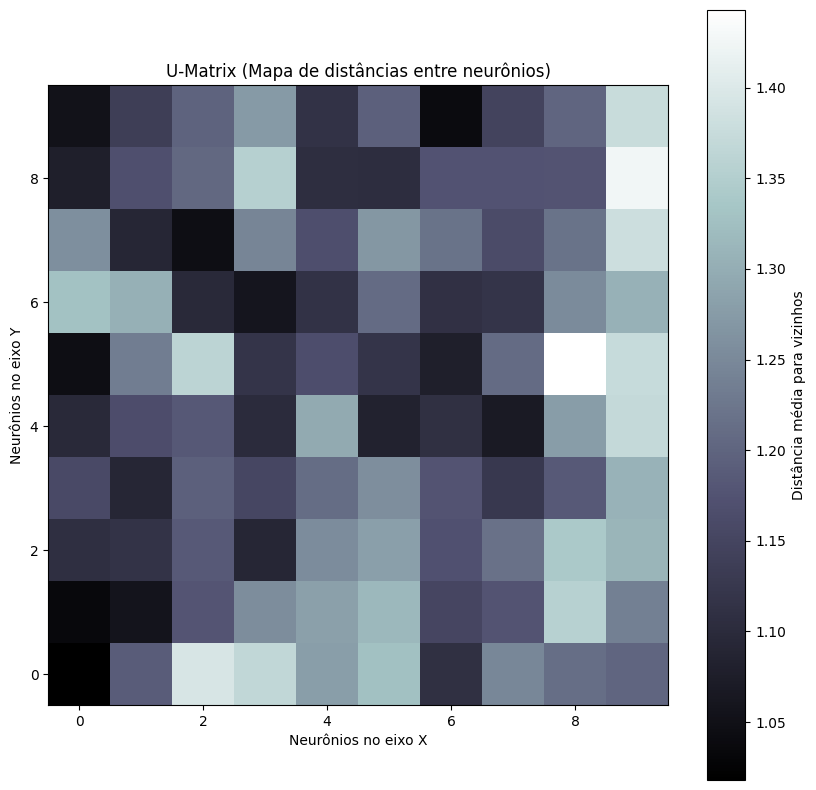

In [35]:
plt.figure(figsize=(10, 10))
plt.title("U-Matrix (Mapa de distâncias entre neurônios)")

u_matrix = np.zeros((som_shape[0], som_shape[1]))
weights = som.get_weights()

for i in range(som_shape[0]):
    for j in range(som_shape[1]):
        neighbors = []
        if i > 0: neighbors.append(weights[i - 1, j])
        if i < som_shape[0] - 1: neighbors.append(weights[i + 1, j])
        if j > 0: neighbors.append(weights[i, j - 1])
        if j < som_shape[1] - 1: neighbors.append(weights[i, j + 1])
        distances = [np.linalg.norm(weights[i, j] - n) for n in neighbors]
        u_matrix[i, j] = np.mean(distances)

plt.imshow(u_matrix.T, cmap='bone', origin='lower')
plt.colorbar(label='Distância média para vizinhos')
plt.xlabel("Neurônios no eixo X")
plt.ylabel("Neurônios no eixo Y")
plt.show()


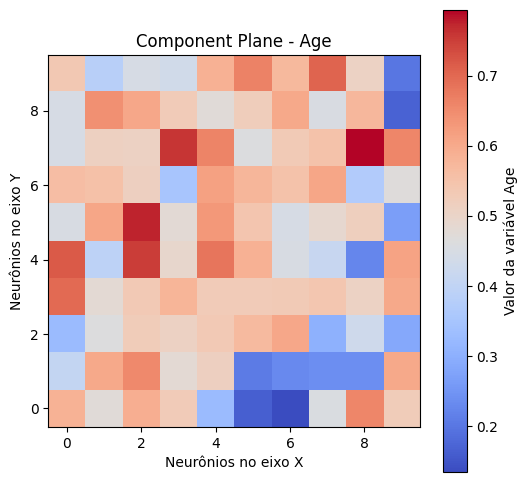

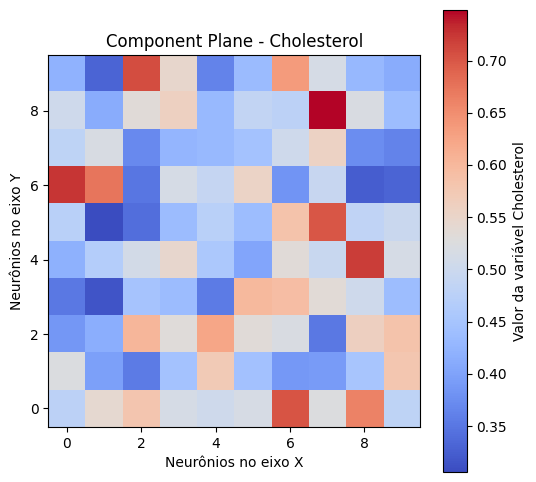

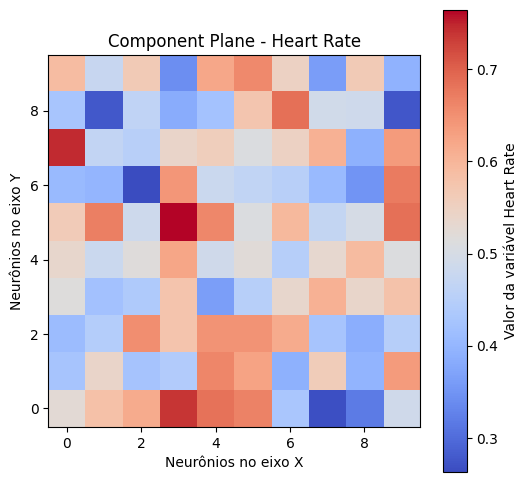

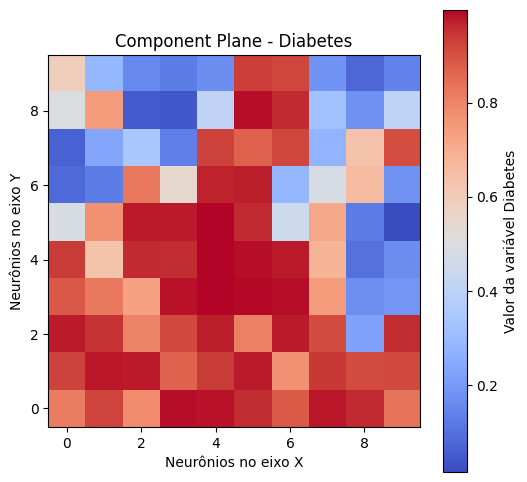

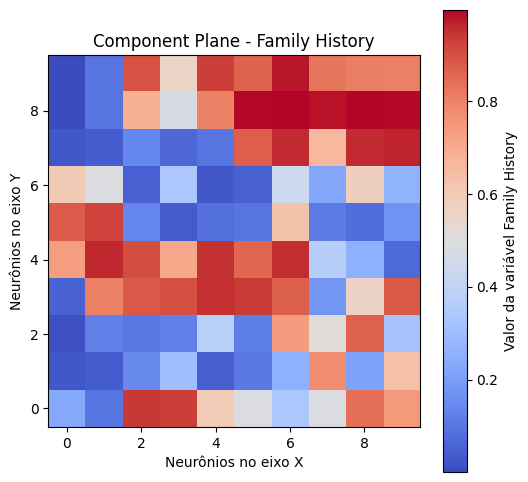

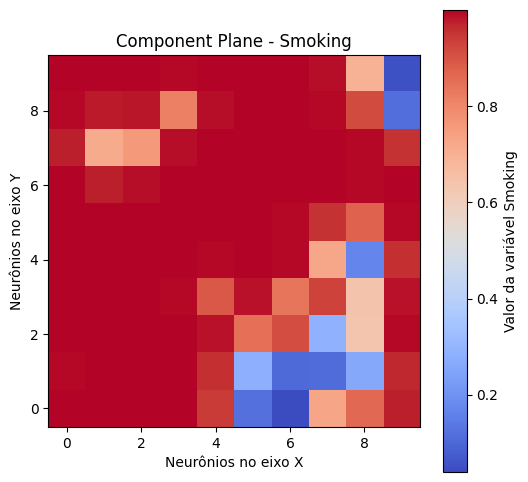

In [36]:
variables = df.columns[:6]  # você pode aumentar para df.columns[:12] ou usar df.columns para todas
weights = som.get_weights()

for i, var in enumerate(variables):
    plt.figure(figsize=(6, 6))
    plt.title(f"Component Plane - {var}")

    plane = np.zeros((som_shape[0], som_shape[1]))
    for x in range(som_shape[0]):
        for y in range(som_shape[1]):
            plane[x, y] = weights[x, y, i]

    plt.imshow(plane.T, cmap='coolwarm', origin='lower')
    plt.colorbar(label=f'Valor da variável {var}')
    plt.xlabel("Neurônios no eixo X")
    plt.ylabel("Neurônios no eixo Y")
    plt.show()


## 6. Divisão de Teste e Treino

- 80% Treino
- 20% Teste

In [37]:
# Definir features (X) e target (y)
X = df.drop(columns=['Heart Attack Risk'])  # Remove a variável alvo
Y = df['Heart Attack Risk']  # Define a variável alvo

# Dividir em 80% treino e 20% teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Exibir o tamanho dos conjuntos
print(f"Treinamento: {X_train.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")

Treinamento: 7010 amostras
Teste: 1753 amostras


## 7. Balanceado/Não Balanceado

Obs: neste caso não esta balanceado

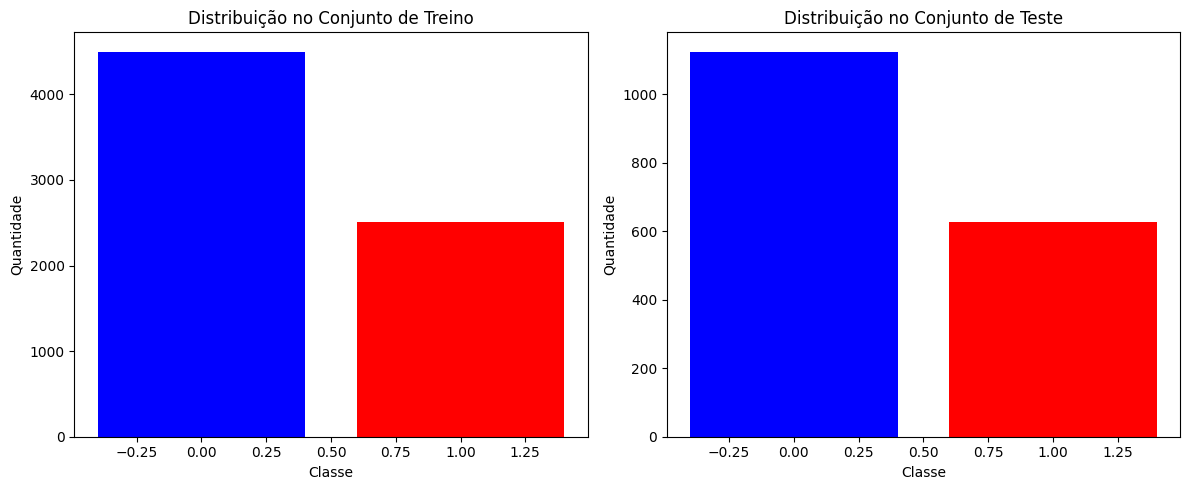

Proporção no conjunto de treino:
Heart Attack Risk
0    0.641797
1    0.358203
Name: count, dtype: float64

Proporção no conjunto de teste:
Heart Attack Risk
0    0.641757
1    0.358243
Name: count, dtype: float64


In [38]:
# Contar a quantidade de amostras em cada classe
train_counts = Y_train.value_counts()
test_counts = Y_test.value_counts()

# Criar gráfico de barras para visualizar o balanceamento
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para conjunto de treino
ax[0].bar(train_counts.index, train_counts.values, color=['blue', 'red'])
ax[0].set_title("Distribuição no Conjunto de Treino")
ax[0].set_xlabel("Classe")
ax[0].set_ylabel("Quantidade")

# Gráfico para conjunto de teste
ax[1].bar(test_counts.index, test_counts.values, color=['blue', 'red'])
ax[1].set_title("Distribuição no Conjunto de Teste")
ax[1].set_xlabel("Classe")
ax[1].set_ylabel("Quantidade")

# Exibir gráfico
plt.tight_layout()
plt.show()

# Exibir proporções
print("Proporção no conjunto de treino:")
print(train_counts / len(Y_train))

print("\nProporção no conjunto de teste:")
print(test_counts / len(Y_test))

In [39]:
from imblearn.over_sampling import SMOTE

# Instanciar o SMOTE
smote = SMOTE(random_state=42)

# Aplicar o SMOTE ao conjunto de treino
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

print("✅ Conjunto de treino balanceado com sucesso!")


✅ Conjunto de treino balanceado com sucesso!


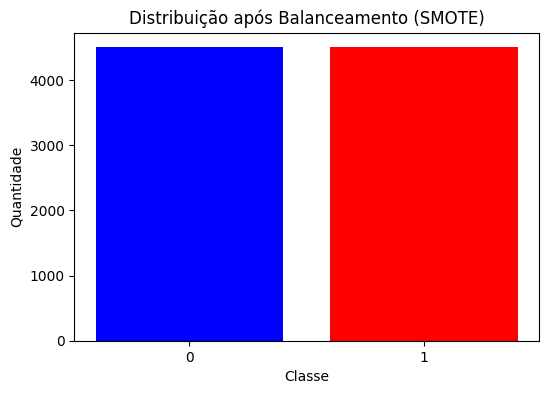

Proporções após SMOTE:
Classe 0: 4499 (50.00%)
Classe 1: 4499 (50.00%)


In [40]:
from collections import Counter
import matplotlib.pyplot as plt

# Contar a nova distribuição após o balanceamento
resampled_counts = Counter(Y_train_resampled)

# Gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(resampled_counts.keys(), resampled_counts.values(), color=['blue', 'red'])
plt.title("Distribuição após Balanceamento (SMOTE)")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.xticks([0, 1])
plt.show()

# Proporção
total = sum(resampled_counts.values())
print("Proporções após SMOTE:")
for cls, count in resampled_counts.items():
    print(f"Classe {cls}: {count} ({count / total:.2%})")

## 8. Construindo a rede neural

### Importante

**O que é o que é?**

 *Opções de otimizadores*
      # optimizer='sgd'  # Stochastic Gradient Descent (descida do gradiente estocástica)
      # optimizer='adam'  # Adaptive Moment Estimation (Adam), muito usado
      # optimizer='adagrad'  # Adaptive Gradient, ajusta taxa de aprendizado automaticamente
      # optimizer='nadam'  # Nesterov-accelerated Adaptive Moment Estimation, variação do Adam
  *Opções de funções de perda (loss)*
      # loss='categorical_crossentropy'  # Para classificação multiclasse com one-hot encoding
      # loss='sparse_categorical_crossentropy'  # Para classificação multiclasse com labels inteiros
      # loss='binary_crossentropy'  # Para classificação binária (0 ou 1)
      # loss='mean_squared_error'  # Erro quadrático médio, usado em regressão
      # loss='mean_absolute_error'  # Erro absoluto médio, penaliza menos que MSE
      # loss='huber'  # Combinação de MSE e MAE, útil para lidar com outliers
  *Opções de métricas de avaliação (colocar quantas quiser)*
      # metrics=['accuracy']  # Para classificação com classes balanceadas
      # metrics=['precision', 'recall']  # Para problemas desbalanceados
      # metrics=['mse']  # Mean Squared Error, usado para regressão
      # metrics=['mae']  # Mean Absolute Error, usado para regressão

In [42]:
# Número de características (features) após o pré-processamento
input_dim = X_train.shape[1]  # Certifique-se de que X_train foi previamente definido

# Construindo o modelo de rede neural
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilando o modelo
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])

# Exibindo a arquitetura
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,697 (53.50 KB)

 Trainable params: 13,697 (53.50 KB)

 Non-trainable params: 0 (0.00 B)

## 9. Treinando o modelo

### Importante
*Opções de monitoramento para EarlyStopping*
      # monitor='val_loss'  # Perda no conjunto de validação (mais comum)
      # monitor='loss'  # Perda no conjunto de treino
      # monitor='val_accuracy'  # Acurácia no conjunto de validação
      # monitor='accuracy'  # Acurácia no conjunto de treino

In [43]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

historico = model.fit(X_train, Y_train,
                      epochs=60,
                      validation_split=0.2,  # 20% dos dados de treino serão usados para validação
                      callbacks=[early_stopping])

Epoch 1/60
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5332 - auc_1: 0.4945 - loss: 1479.0441 - val_accuracy: 0.3659 - val_auc_1: 0.4998 - val_loss: 20.3210
Epoch 2/60
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5294 - auc_1: 0.4864 - loss: 216.0511 - val_accuracy: 0.6341 - val_auc_1: 0.5000 - val_loss: 21.6165
Epoch 3/60
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5452 - auc_1: 0.5035 - loss: 86.8941 - val_accuracy: 0.6341 - val_auc_1: 0.4933 - val_loss: 11.7743
Epoch 4/60
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5213 - auc_1: 0.4865 - loss: 39.8573 - val_accuracy: 0.6127 - val_auc_1: 0.5037 - val_loss: 0.7018
Epoch 5/60
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5437 - auc_1: 0.4862 - loss: 23.1312 - val_accuracy: 0.3666 - val_auc_1: 0.4953 - val_loss: 2.2024
Epoch 6/60
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5487 - auc_1: 0.4910 - loss: 13.5482 - val_accuracy: 0.6341 - val_auc_1: 0.4973 - val_loss: 5.0187
Epoc

## 10. Analisando o desempenho

In [46]:
results = model.evaluate(X_test, Y_test)
print(results)


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6383 - auc_1: 0.5000 - loss: 0.6545
[0.6526026725769043, 0.6417570114135742, 0.5]


In [47]:
test_loss, test_acc, test_auc = results
print(f"Acurácia: {test_acc:.2f}")
print(f"AUC: {test_auc:.2f}")
print(f"Loss: {test_loss:.4f}")


Acurácia: 0.64
AUC: 0.50
Loss: 0.6526


## 11. Visualizando a curva de acurácia e de perda

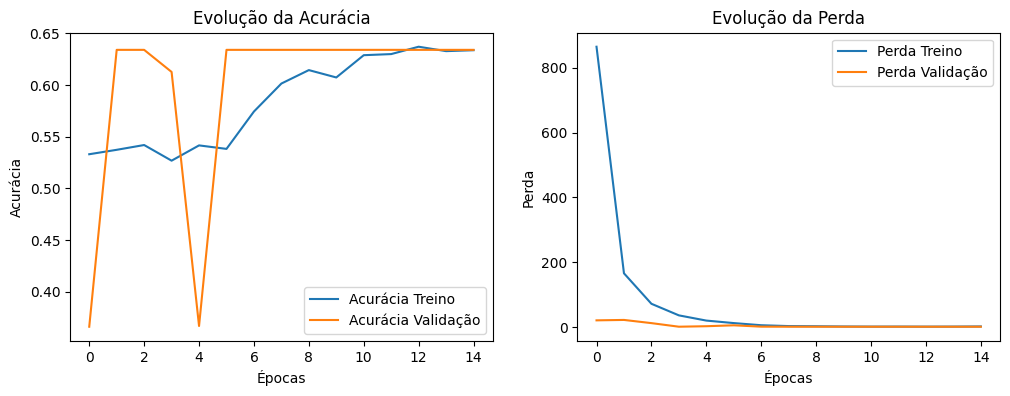

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plotando a acurácia
ax1.plot(historico.history['accuracy'], label='Acurácia Treino')
ax1.plot(historico.history['val_accuracy'], label='Acurácia Validação')
ax1.set_title('Evolução da Acurácia')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Acurácia')
ax1.legend()

# Plotando a perda
ax2.plot(historico.history['loss'], label='Perda Treino')
ax2.plot(historico.history['val_loss'], label='Perda Validação')
ax2.set_title('Evolução da Perda')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Perda')
ax2.legend()

plt.show()

## 12. Comparando previsões com rótulos reais

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


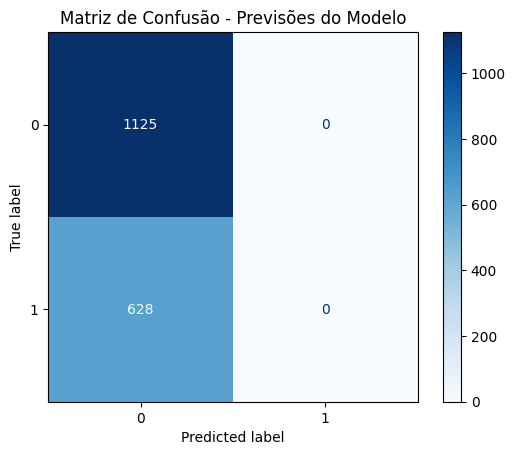

In [49]:
# 🔮 Gerar previsões com o modelo treinado
Y_pred = model.predict(X_test)

# 🎯 Converter probabilidades em classes (0 ou 1)
Y_pred_classes = (Y_pred > 0.5).astype(int)

# 🧾 Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Previsões do Modelo")
plt.show()


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Ou X_train


In [51]:
import pandas as pd
import numpy as np

# 1. Escalar os dados de teste (caso ainda não esteja feito)
X_test_scaled = scaler.transform(X_test)

# 2. Fazer previsões com o modelo treinado
Y_pred = model.predict(X_test_scaled)

# 3. Arredondar para 0 ou 1 (transformar probabilidades em classes)
Y_pred_classes = (Y_pred > 0.5).astype(int)

# 4. Criar tabela de comparação
tabela_resultados = pd.DataFrame({
    'Valor Real': Y_test.values,                      # Valores reais
    'Valor Previsto': Y_pred_classes.flatten(),       # Classes previstas
})

# 5. Adicionar coluna de acerto
tabela_resultados['Acertou?'] = tabela_resultados['Valor Real'] == tabela_resultados['Valor Previsto']

print("Total de acertos:", tabela_resultados['Acertou?'].sum())
print("Total de previsões:", len(tabela_resultados))
print("Acurácia calculada manualmente:", (tabela_resultados['Acertou?'].mean() * 100).round(2), "%")

# 6. Mostrar as 10 primeiras previsões
tabela_resultados.head(10)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Total de acertos: 1125
Total de previsões: 1753
Acurácia calculada manualmente: 64.18 %


,Valor Real,Valor Previsto,Acertou?
0,0,0,True
1,0,0,True
2,0,0,True
3,1,0,False
4,0,0,True
5,1,0,False
6,1,0,False
7,0,0,True
8,1,0,False
9,0,0,True


## Análise e Comparação com MLP

O SOM foi capaz de identificar agrupamentos naturais entre os pacientes, com base em seus fatores de risco. As visualizações como a U-Matrix e os Component Planes revelaram divisões claras no espaço dos dados. Por exemplo, observamos que variáveis como obesidade e histórico familiar se destacam em certos grupos.

Comparando com o MLP utilizado no trabalho anterior, percebemos que o SOM não realiza classificação direta, mas fornece uma compreensão visual e interpretável dos padrões presentes no conjunto de dados. O MLP é mais eficaz para predição, enquanto o SOM nos ajuda a entender a estrutura dos dados e reforçar decisões explicáveis.
